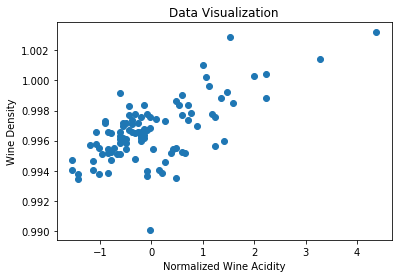

----------Results---------
Number of Iterations: 81
Learning Rate: 0.2
Final Parameters i.e. Theta values
Theta[0] [0.99662009]
Theta[1] [0.0013402]
Stopping Criteria: Diff. in J(i)-J(i-1)= ) 1.1e-16
----------------------------------


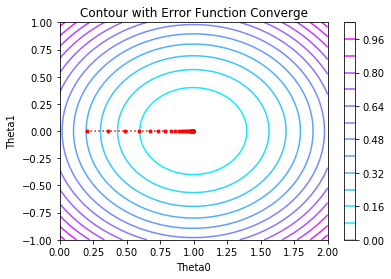

In [16]:
'''
************************************************
** COL774 Machine Learning
** Assignment 1: Least Squares Linear Regression
** Question 1
** @Author: Aman Bhardwaj
** @Entry No. 2019SIY7580
** @Date: 23 Jan 2020
************************************************
'''

import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
from sklearn import preprocessing as pp
import time

'''Normalize Array Data'''
def normalize(x):
    mean = np.mean(x)
    stanDev = np.std(x)
    #print(mean, stanDev)
    for i in range(len(x)):
        x[i] = (x[i] - mean) / stanDev
    return x

'''
# Import Data from CSV
# Create panda dataframes and store them as X and Y
# X = Parameters 
# Y = Labels
'''
xData = pa.read_csv('linearX.csv', names=['Wine Acidity'])
yData = pa.read_csv('linearY.csv', names=['Wine Density'])

# Standardize the data for proper learning of model
#ppObj = pp.StandardScaler()

#Normalize Wine Acidity parameter and store in scaled_X variable
#scaled_X = ppObj.fit_transform(xData)
scaled_X = normalize(xData['Wine Acidity'])

#Standardize Wine Density Label and store in scaled_Y variable
#scaled_Y = ppObj.fit_transform(yData)
#scaled_Y = pa.DataFrame(scaled_Y)
scaled_Y = np.array([yData['Wine Density']]).T
#scaled_Y = yData
#Data Visualization of standardized data
#Plot X vs Y
#To check if linear model can be a good learning model for this data
#%matplotlib inline
%matplotlib inline
fig = plt.figure(1)
plt.plot(scaled_X, scaled_Y, 'o')
plt.xlabel("Normalized Wine Acidity")
plt.ylabel("Wine Density")
plt.title("Data Visualization")
plt.show()
#fig.savefig("plots/data_visualization.png", dpi= 300, pad_inches=0.1, format='png')

#Define Global Variables for Batch Gradient Descent
m = len(xData) #Number of samples
X = np.c_[np.ones(m),scaled_X] #Introduce intercept term with X0 whose all values = 1
Y = scaled_Y
theta = np.zeros((2,1)) #as per instructions taking Theta0 = vector of 0s
X_T = X.T #X Transpose

#function to calculate Cost Function J(theta) in each iteration
def errorFunction(d):
    sumOfLeastSquares = np.sum(d**2)
    errorFun = sumOfLeastSquares/(2*m)
    return errorFun

##Q1.(a) Gradient Descent Implementation
"""
Params 
x = Features
y = Labels
t = update parameter theta
lr = Learning Rate
maxIterations = Maximum iterations to keep a cap on loop
"""
def gradientDescent(x, y, t, lr, ep, maxIterations):
    totalFeatures = 1
    totalExamples = m
    
    jThetaList = []
    jPrev = 0.0
    thetaList = []
    count = 0
    converge = False
    while not converge and count != maxIterations:
        error = y - (x @ t)
        jTheta = errorFunction(error)
        
        jThetaList.append(jTheta)
        #print((x @ t).shape, x.shape)
        gradient = x.T@(y - (x @ t))
        
        t = t + lr*(gradient/(m)) #update theta
        thetaList.append(t)
        count += 1
        
        if (abs(jPrev - jTheta) < ep):
            converge = True
        jPrev = jTheta
    #print(count, jThetaList, thetaList)
    return jThetaList, thetaList, count

'''
#Report the outputs
Params:
i: Number of Iterations
t: Theta parameter
lr: learning rate
ep: stoping criteria
'''
def printResults(i, t, lr, ep):    
    print("----------Results---------")
    print("Number of Iterations:", i)    
    print("Learning Rate:", lr)
    print("Final Parameters i.e. Theta values")
    print("Theta[0]",t[0])
    print("Theta[1]",t[1]) 
    print("Stopping Criteria: Diff. in J(i)-J(i-1)= )",ep)
    print("----------------------------------")

'''
#Q1.(b) plot the Hypothesis and DataPoints
params
t: theta
x: input examples
'''
def plotHypothesis(t, x, y, J):
    hypo = np.dot(x , t)
    fig = plt.figure(2)
    plt.plot(x[:,1], y, 'o', label='Data Points')
    plt.plot(x[:,1], hypo, '#f5972c', label='Hypothesis')
    plt.ylabel("Wine Density(y) & Hypothesis")
    plt.xlabel("Wine Acidity(x)")
    plt.title("Hypothesis and DataPoints")
    plt.legend()
    plt.show()
    #fig.savefig("plots/q1_b_hypothesis.png", dpi= 300, pad_inches=0.1, format='png')
    fig = plt.figure(3)
    plt.plot(jThetaList, label='jTheta')
    plt.xlabel("No. of Iterations")
    plt.ylabel("jTheta")
    plt.title("Descent of Error Function J(theta)")
    plt.legend()
    plt.show()
    #fig.savefig("plots/q1_b_hypothesis.png", dpi= 300, pad_inches=0.1, format='png')
    return

'''
#Plot Surface with Jtheta values
params:
t0: Theta0
t1: theta1
jtlist: list of all the values of theta computed in each update
animate: whether to plot with time delay of 0.02 seconds
'''
def surfacePlot(t0, t1, jtList, animate):
    #Mesh for 3D Plot
    xGrid = np.linspace(0,2,25)
    yGrid = np.linspace(-1,1,25)
    xGrid, yGrid = np.meshgrid(xGrid, yGrid)
    J = np.zeros(xGrid.shape)

    gridValues = np.array([xGrid.flatten(), yGrid.flatten()])
    gridValues = gridValues.T
    jThetaValues = []
    for row in gridValues:
        error = Y - (X @ row)
        jThetaValues.append(errorFunction(error)/(m))
        
    J = np.array(jThetaValues).reshape(xGrid.shape)
    
    if(animate):
        plt.ion()
        %matplotlib notebook
    else:
        %matplotlib inline
    
    figS = plt.figure(4)
    ax =  figS.gca(projection="3d")
    
    sPlot = ax.plot_surface(xGrid, yGrid, J,cmap='cool', edgecolor='none', zorder=5)
    ax.set_title('3D Mesh with Error Function Converge')
    ax.set_xlabel('Theta0', labelpad=5)
    ax.set_ylabel('Theta1', labelpad=5)
    ax.set_zlabel('J(theta)',labelpad=5)
    figS.colorbar(sPlot)
    #ax.view_init()
    #plt.show()
    if animate:
        for i in range(len(jtList) - 1):
            #%matplotlib notebook
            ax.plot([t0[i], t0[i + 1]], [t1[i], t1[i + 1]], [jtList[i], jtList[i + 1]], 
                    color='red', marker='o',fillstyle = 'full', linestyle='dotted', markersize=5,  zorder= 10)
            figS.canvas.draw()            
            plt.pause(0.2)
    else:
        #%matplotlib inline       
        ax.plot(t0, t1, jtList, 'ro', fillstyle = 'full', linestyle='dotted', markersize=3, zorder= 10)
        plt.show()
    
    plt.show()
    #figS.savefig("plots/q1_c_3D_Mesh.png", dpi= 300, pad_inches=0.1, format='png')
        
    return

'''
#Plot contour with Jtheta values
params:
t0: Theta0
t1: theta1
jtlist: list of all the values of theta computed in each update
animate: whether to plot with time delay of 0.02 seconds
'''
def contourPlot(t0, t1, jtList, animate):
    
    #Mesh for contour Plot
    yGrid = np.linspace(-1,1,100)
    xGrid = np.linspace(0,2,100)
    xGrid, yGrid = np.meshgrid(xGrid, yGrid)
    J = np.zeros(xGrid.shape)
    
    gridValues = np.array([xGrid.flatten(), yGrid.flatten()])
    gridValues = gridValues.T
    jThetaValues = []
    for row in gridValues:
        error = Y - (X @ row)
        jThetaValues.append(errorFunction(error)/(m))
        
    J = np.array(jThetaValues).reshape(xGrid.shape)
    
    if(animate):
        plt.ion()
        %matplotlib notebook
    else:
        %matplotlib inline
        
    figC = plt.figure(5)
    ax1 = figC.add_subplot(111)
    
    cPlot = ax1.contour(xGrid, yGrid, J, 15, cmap='cool')
    figC.colorbar(cPlot)
    ax1.set_title('Contour with Error Function Converge')
    ax1.set_xlabel('Theta0', labelpad=5)
    ax1.set_ylabel('Theta1', labelpad=5)
    
    #plt.show()
    if animate:
        for i in range(len(jtList)):
            ax1.plot(t0[i], t1[i], 'ro',fillstyle = 'full',linestyle='dotted', markersize=3)
            figC.canvas.draw()
            plt.pause(0.2)
            #plt.show()
            
    else:        
        plt.plot(t0, t1, 'ro', fillstyle = 'full',linestyle='dotted', markersize=3)
        plt.show()        
    
    #figC.savefig("plots/q1_e_0.1.png", dpi= 300, pad_inches=0.1, format='png')
    return

def getThetaLists(thetaList):
    t0 = []
    t1 = []
    for elem in thetaList:
        t0.append(elem[0][0])
        t1.append(elem[1][0])
    return t0, t1



if __name__ == '__main__':
    #------------Q1.a-------------#
    learn = 0.2 #Learning Rate
    epsilon = 1.1e-16 #stop crietria
    jThetaList, thetaList, itr = gradientDescent(X, Y, theta, learn, epsilon , 10000)
    printResults(itr, thetaList[-1], learn, epsilon)
    
    #------------Q1.b-------------#
    plotHypothesis(thetaList[-1], X, Y, jThetaList)
    
    
    theta0, theta1 = getThetaLists(thetaList)
    #------------Q1.c-------------#
    surfacePlot(theta0, theta1, jThetaList, True)
    
    #------------Q1.d-------------#
    contourPlot(theta0, theta1, jThetaList, True)
    
    #------------Q1.e-------------#
    learn = 0.001
    epsilon = 8.1e-16 #stop crietria
    jThetaList, thetaList, itr = gradientDescent(X, Y, theta, learn, epsilon , 10000)
    printResults(itr, thetaList[-1], learn, epsilon)

    contourPlot(theta0, theta1, jThetaList, False)
    
    learn = 0.025
    epsilon = 1.1e-14 #stop crietria
    jThetaList, thetaList, itr = gradientDescent(X, Y, theta, learn, epsilon , 10000)
    printResults(itr, thetaList[-1], learn, epsilon)
    %matplotlib inline
    #plotHypothesis(thetaList[-1], X, Y, jThetaList)
    theta0, theta1 = getThetaLists(thetaList)

    contourPlot(theta0, theta1, jThetaList, False)    
    
    learn = 0.1
    epsilon = 1.1e-16 #stop crietria
    jThetaList, thetaList, itr = gradientDescent(X, Y, theta, learn, epsilon , 10000)
    printResults(itr, thetaList[-1], learn, epsilon)
    %matplotlib inline
    #plotHypothesis(thetaList[-1], X, Y, jThetaList)
    theta0, theta1 = getThetaLists(thetaList)

    contourPlot(theta0, theta1, jThetaList, False)
    
    
    

----------Results---------
Number of Iterations: 10000
Learning Rate: 0.001
Final Parameters i.e. Theta values
Theta[0] [0.99657508]
Theta[1] [0.00134014]
Stopping Criteria: Diff. in J(i)-J(i-1)= ) 8.1e-16
----------------------------------


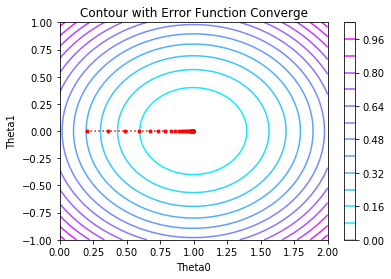

In [15]:
learn = 0.001
epsilon = 8.1e-16 #stop crietria
jThetaList, thetaList, itr = gradientDescent(X, Y, theta, learn, epsilon , 10000)
printResults(itr, thetaList[-1], learn, epsilon)
#plotHypothesis(thetaList[-1], X, Y, jThetaList)
#theta0, theta1 = getThetaLists(thetaList)

contourPlot(theta0, theta1, jThetaList, False)

----------Results---------
Number of Iterations: 564
Learning Rate: 0.025
Final Parameters i.e. Theta values
Theta[0] [0.99661947]
Theta[1] [0.0013402]
Stopping Criteria: Diff. in J(i)-J(i-1)= ) 1.1e-14
----------------------------------


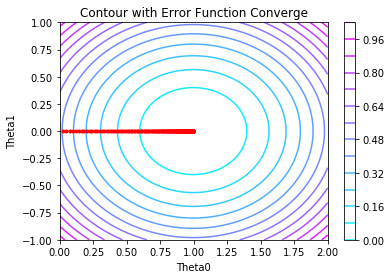

In [58]:
learn = 0.025
epsilon = 1.1e-14 #stop crietria
jThetaList, thetaList, itr = gradientDescent(X, Y, theta, learn, epsilon , 10000)
printResults(itr, thetaList[-1], learn, epsilon)
%matplotlib inline
#plotHypothesis(thetaList[-1], X, Y, jThetaList)
theta0, theta1 = getThetaLists(thetaList)

contourPlot(theta0, theta1, jThetaList, False)

----------Results---------
Number of Iterations: 166
Learning Rate: 0.1
Final Parameters i.e. Theta values
Theta[0] [0.99662007]
Theta[1] [0.0013402]
Stopping Criteria: Diff. in J(i)-J(i-1)= ) 1.1e-16
----------------------------------


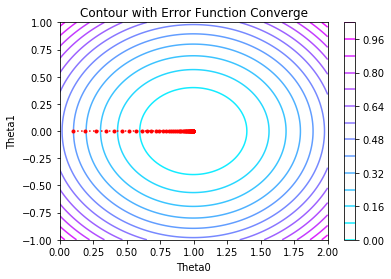

In [60]:
learn = 0.1
epsilon = 1.1e-16 #stop crietria
jThetaList, thetaList, itr = gradientDescent(X, Y, theta, learn, epsilon , 10000)
printResults(itr, thetaList[-1], learn, epsilon)
%matplotlib inline
#plotHypothesis(thetaList[-1], X, Y, jThetaList)
theta0, theta1 = getThetaLists(thetaList)

contourPlot(theta0, theta1, jThetaList, False)